In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer

# Call the function
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Inputs and targets
X, Y = data.data, data.target
print(X.shape, Y.shape)

(569, 30) (569,)


In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
D = X.shape[1]
print(D)

# Recall: the shape of the data is "N x D"
model = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())

30


In [10]:
# Convert data into torch tensors
X_train2 = torch.from_numpy(X_train.astype(np.float32))
X_test2 = torch.from_numpy(X_test.astype(np.float32))
y_train2 = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test2 = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(X_train.shape, y_train.shape)

(381, 30) (381,)


In [11]:
# Loss and optimizer
criterion = nn.BCELoss()    # Binary Classification Entropy Loss Function
optimizer = torch.optim.Adam(model.parameters())

In [12]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)>

In [13]:
# ?nn.BCELoss

In [14]:
# ?model

In [15]:
# Train the model
n_epochs = 1000
losses = []

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(X_train2)
    loss = criterion(outputs, y_train2)
    
    # Backward and Optimization
    loss.backward()
    optimizer.step()
    
    # Get test loss
    outputs_test = model(X_test2)
    loss_test = criterion(outputs_test, y_test2)
    
    # Save losses
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()
    
    if (it + 1) % 50 == 0:
        print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.3536, Test Loss: 0.3797
Epoch 100/1000, Train Loss: 0.2721, Test Loss: 0.2983
Epoch 150/1000, Train Loss: 0.2265, Test Loss: 0.2497
Epoch 200/1000, Train Loss: 0.1967, Test Loss: 0.2166
Epoch 250/1000, Train Loss: 0.1754, Test Loss: 0.1924
Epoch 300/1000, Train Loss: 0.1592, Test Loss: 0.1739
Epoch 350/1000, Train Loss: 0.1465, Test Loss: 0.1595
Epoch 400/1000, Train Loss: 0.1362, Test Loss: 0.1479
Epoch 450/1000, Train Loss: 0.1276, Test Loss: 0.1386
Epoch 500/1000, Train Loss: 0.1204, Test Loss: 0.1309
Epoch 550/1000, Train Loss: 0.1142, Test Loss: 0.1246
Epoch 600/1000, Train Loss: 0.1088, Test Loss: 0.1192
Epoch 650/1000, Train Loss: 0.1041, Test Loss: 0.1147
Epoch 700/1000, Train Loss: 0.0999, Test Loss: 0.1108
Epoch 750/1000, Train Loss: 0.0961, Test Loss: 0.1074
Epoch 800/1000, Train Loss: 0.0928, Test Loss: 0.1045
Epoch 850/1000, Train Loss: 0.0897, Test Loss: 0.1019
Epoch 900/1000, Train Loss: 0.0870, Test Loss: 0.0996
Epoch 950/1000, Train Loss: 0

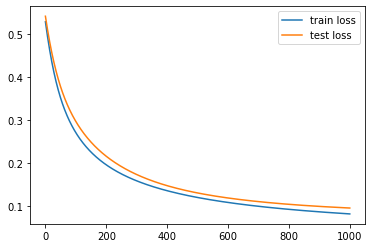

In [16]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [17]:
# Get accuracy
with torch.no_grad():
    p_train = model(X_train2)     # p_train is probability
    p_train = np.round(p_train.numpy())   # round make 반올림
    train_acc = np.mean(y_train2.numpy() == p_train)   # 1 or 0 --> 같으면 정확한 것이다. True = 1, False = 0
    
    p_test = model(X_test2)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test2.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9894


## Save and Load Model

In [18]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4617, -0.2916, -0.3819, -0.3975, -0.2619, -0.0930, -0.3981, -0.4980,
                       -0.0048,  0.7183, -0.4683,  0.1893, -0.2493, -0.5209, -0.0798,  0.2268,
                       -0.2128, -0.2369,  0.0627,  0.5002, -0.4942, -0.6129, -0.3826, -0.3462,
                       -0.5232, -0.3174, -0.2038, -0.3062, -0.3267, -0.5072]])),
             ('0.bias', tensor([0.3799]))])

In [23]:
# Save the model
torch.save(model.state_dict(), './model/mymodel.pt')

In [26]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.

model2 = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())

model2.load_state_dict(torch.load('./model/mymodel.pt'))

<All keys matched successfully>

In [27]:
## Evaluate the new model
# Results should be the same!

with torch.no_grad():
    p_train = model2(X_train2)     # p_train is probability
    p_train = np.round(p_train.numpy())   # round make 반올림
    train_acc = np.mean(y_train2.numpy() == p_train)   # 1 or 0 --> 같으면 정확한 것이다. True = 1, False = 0
    
    p_test = model2(X_test2)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test2.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9894
